In [1]:
%pip install -q pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np 

In [12]:
# Texas data saved in another file - first step merge texas with all data
transactions = pd.read_parquet('../../00_Data/Transaction_Data/07_merged_parquet/all_states_merged.parquet')
transactions_texas = pd.read_parquet('../../00_Data/Transaction_Data/06_PerCapitaMME/texas_year_PC.parquet')

In [5]:
transactions_texas.drop(columns=['per_capita_MME_g'], inplace=True)

In [7]:
all_transactions = pd.concat([transactions, transactions_texas], ignore_index=True)

In [8]:
annual_data = all_transactions.groupby(['BUYER_STATE', 'TransactionYear'])[['per_capita_MME_mg']].mean().reset_index()

## Washington

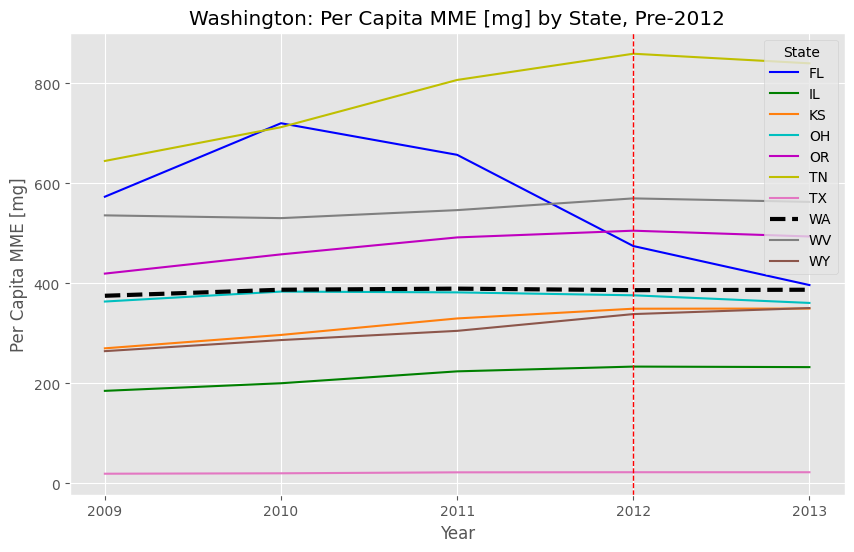

In [10]:
colors = {
    'FL': 'b',
'IL':'g',
'KS':'tab:orange',
'OH':'c',
'OR':'m',
'TN':'y',
'TX':'tab:pink',
'WA':'k',
'WV':'0.5',
'WY':'tab:brown',
}

years = [2009,2010,2011,2012,2013]
wash_data = annual_data[annual_data['TransactionYear'].isin(years)]

# Set the style for the plot (optional)
plt.style.use('ggplot')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state's data as a separate line
for state in wash_data['BUYER_STATE'].unique():
    if state == 'WA':
        state_data = wash_data[wash_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, linewidth=3.0, color=colors[state], linestyle='dashed')
    else:
        state_data = wash_data[wash_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, color=colors[state])


# Add titles and labels
ax.set_title('Washington: Per Capita MME [mg] by State, Pre-2012')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita MME [mg]')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.axvline(x=2012, color='r', linestyle='--', linewidth=1)

# Add a legend
ax.legend(title='State', loc='upper right', frameon=True, facecolor='0.9')

# Show the plot
plt.show()


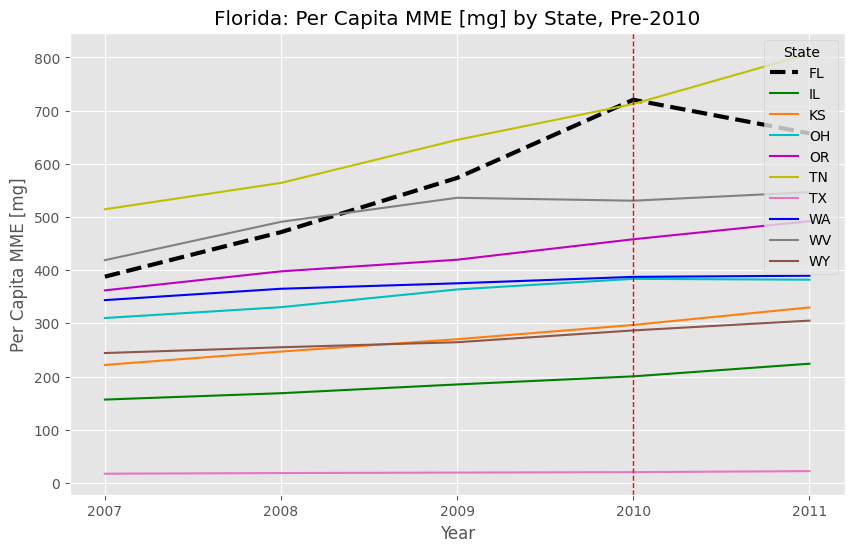

In [11]:
colors = {
'FL': 'k',
'IL':'g',
'KS':'tab:orange',
'OH':'c',
'OR':'m',
'TN':'y',
'TX':'tab:pink',
'WA':'b',
'WV':'0.5',
'WY':'tab:brown',
}

years = [2007,2008,2009,2010,2011]
fl_data = annual_data[annual_data['TransactionYear'].isin(years)]

# Set the style for the plot (optional)
plt.style.use('ggplot')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each state's data as a separate line
for state in fl_data['BUYER_STATE'].unique():
    if state == 'FL':
        state_data = fl_data[fl_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, linewidth=3.0, color=colors[state], linestyle='dashed')
    else:
        state_data = fl_data[fl_data['BUYER_STATE'] == state]
        ax.plot(state_data['TransactionYear'], state_data['per_capita_MME_mg'], label=state, color=colors[state])


# Add titles and labels
ax.set_title('Florida: Per Capita MME [mg] by State, Pre-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita MME [mg]')

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.axvline(x=2010, color='r', linestyle='--', linewidth=1)

# Add a legend
ax.legend(title='State', loc='upper right', frameon=True, facecolor='0.9')

# Show the plot
plt.show()
